In [2]:
import pandas as pd

nwb = pd.read_csv('data/NAVER.csv', encoding='cp949', usecols=['title', 'genre', 'story', 'platform'])
print(nwb.shape)
nwb.head(3)

(445, 4)


,title,genre,story,platform
0,참교육,"스토리, 액션",무너진 교권을 지키기 위해 교권보호국 소속 나화진의 참교육이 시작된다! 부활남 채용...,네이버 웹툰
1,신의 탑,"스토리, 판타지",자신의 모든 것이었던 소녀를 쫓아 탑에 들어온 소년 그리고 그런 소년을 시험하는 탑,네이버 웹툰
2,뷰티풀 군바리,"스토리, 드라마",여자도 군대에 간다면? 본격 여자도 군대 가는 만화!,네이버 웹툰


In [3]:
nwb_end = pd.read_csv('data/Naver_FINISH.csv', encoding='cp949', usecols=['title', 'genre', 'story', 'platform'])
print(nwb_end.shape)
nwb_end.head(3)

(1025, 4)


,title,genre,story,platform
0,국왕과 성기사의 약탈혼,"스토리, 로맨스","그래, 왕이 되었지. 가지고 싶은 건 다 빼앗아 가지려고. 왕위를 찬탈하고 주변국을...",네이버 웹툰
1,성경의 역사,"스토리, 드라마","모두에게 사랑 받기에 모두가 증오하는 그녀, 성경 .원치않는 애정과 증오속에 성경의...",네이버 웹툰
2,이츠마인,"스토리, 스릴러","어떻게 해야 널 지킬 수 있을까, 다정아? 10년 뒤 다정이가 죽는다는 메시지를 본...",네이버 웹툰


In [4]:
# 연재 중, 완결 웹툰 합치기
nwb = pd.concat([nwb, nwb_end])
nwb.reset_index(inplace=True, drop=True)
nwb.fillna('완결', inplace=True)
print(nwb.shape)
nwb.head(3)

(1470, 4)


,title,genre,story,platform
0,참교육,"스토리, 액션",무너진 교권을 지키기 위해 교권보호국 소속 나화진의 참교육이 시작된다! 부활남 채용...,네이버 웹툰
1,신의 탑,"스토리, 판타지",자신의 모든 것이었던 소녀를 쫓아 탑에 들어온 소년 그리고 그런 소년을 시험하는 탑,네이버 웹툰
2,뷰티풀 군바리,"스토리, 드라마",여자도 군대에 간다면? 본격 여자도 군대 가는 만화!,네이버 웹툰


In [5]:
nwb['genre'] = nwb['genre'].str.split(', ').str[1]

In [6]:
lz = pd.read_csv('data/LZ.csv', encoding='cp949', usecols=['title', 'genre', 'story', 'platform'])
print(lz.shape)
lz.head(3)

(127, 4)


,title,genre,story,platform
0,바른쀼생활,일상,"원룸에서 츄리닝 차림으로 한 프러포즈, 그리고 결혼..? 스물일곱 동갑내기의 바른 ...",레진코믹스
1,이토록 다채로운 핏빛,판타지,"피의 색으로 모든 것이 나뉘는 세상. 순수한 색일수록 높은 신분을, 섞이고 섞여 혼...",레진코믹스
2,아스란히,BL,전쟁 중에 화살을 맞은 주인공 휘운 은 자신의 죽음 앞에서 좌절하는 소하 를 남겨두...,레진코믹스


In [7]:
# 네이버, 레진 웹툰 합치기
wb = pd.concat([nwb, lz])
wb.reset_index(inplace=True, drop=True)
print(wb.shape)
wb.tail(3)

(1597, 4)


,title,genre,story,platform
1594,"튀어나왔어요, BL만화!",드라마,슬럼프로 인해 휴재에 들어간 작가 육번 필명 앞에 그의 만화 네버엔딩 튜토리얼 의 ...,레진코믹스
1595,포젯션,판타지,인간계 저 아래의 지하왕국 저저저 에서는 17대 대왕의 갑작스런 하야 선언으로 새로...,레진코믹스
1596,비 마이 게스트[개정판],로맨스,해당 작품은 비 마이 게스트 성인 버전의 일부 장면을 수정한 개정판입니다. 뜨거운 ...,레진코믹스


## 전처리
- 장르, 줄거리에 대하여 특수문자, 숫자 등을 없앤 순수 한글만 남김
- 제목도 하려 했으나, 토큰화 할 때 오류가 생겨 하지 않음

In [8]:
import re

def hangul(text):
    return re.sub('[^ㄱ-ㅎ|ㅏ-ㅣ|가-힣]', ' ', text)

In [9]:
wb_copy = wb[wb['genre']=='판타지'].copy()
wb_copy['genre'] = wb_copy['genre'].apply(lambda x:hangul(x))
wb_copy['story'] = wb_copy['story'].apply(lambda x:hangul(x))

wb_copy.head(3)

,title,genre,story,platform
0,참교육,액션,무너진 교권을 지키기 위해 교권보호국 소속 나화진의 참교육이 시작된다 부활남 채용...,네이버 웹툰
1,신의 탑,판타지,자신의 모든 것이었던 소녀를 쫓아 탑에 들어온 소년 그리고 그런 소년을 시험하는 탑,네이버 웹툰
2,뷰티풀 군바리,드라마,여자도 군대에 간다면 본격 여자도 군대 가는 만화,네이버 웹툰


In [10]:
print(wb['story'][11])
print(wb_copy['story'][11])

알 수 없는 오류로 3000년간 각성 테스트에 갇힌 김기봉. 그 사이 현실에선 10년이 흘렀고, 온 세상은 몬스터와 던전으로 가득차게 되었다. 만렙으로 귀환한 김기봉의 모든 것을 원래대로 돌려놓기 위한 싸움이 시작된다!
알 수 없는 오류로     년간 각성 테스트에 갇힌 김기봉  그 사이 현실에선   년이 흘렀고  온 세상은 몬스터와 던전으로 가득차게 되었다  만렙으로 귀환한 김기봉의 모든 것을 원래대로 돌려놓기 위한 싸움이 시작된다 


In [11]:
with open('data/stopwords_korean.txt', 'r', encoding='utf8') as f:
    stopwords = f.readline()
stopwords = stopwords.split()

stopwords += ['이야기', '시작', '보다', '이다', '위해']
print(stopwords[-10:])

['좀', '원', '잘', '통하', '놓', '이야기', '시작', '보다', '이다', '위해']


## 토큰화
- KoNLPy 설치 (교재 538 ~ 540 페이지)
- Mecab 설치(윈도우) (https://cleancode-ws.tistory.com/97)
- stemming : 갇힌 > 갇히다 등 단어의 원형으로 되돌리는 것
    - konlpy에서는 Okt만 지원함

In [12]:
from konlpy.tag import Okt
okt = Okt() # Okt : Open Korean Text

def okt_tokenizer(text):
    malist = okt.nouns(text)
    filtered_words = []
    # 필요한 어구만 대상으로 하기
    for word in malist:
        if (word not in stopwords) and (len(word) > 1):
            filtered_words.append(word)
    return filtered_words

In [13]:
print(okt_tokenizer(wb_copy['story'][11]))

['오류로', '각성', '테스트', '김기봉', '사이', '현실', '세상', '몬스터', '던전', '가득', '만렙', '귀환', '김기봉', '모든', '원래', '싸움']


In [14]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis.gensim_models
import pyLDAvis

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [16]:
#텍스트 데이터를 리스트로 변환
Data_list=wb_copy[wb_copy['genre']=='판타지'].story.values.tolist()

#리스트를 요소별로 가져와서 토큰화 후 저장
data_word=[]
for i in range(len(Data_list)):
    data_word.append(okt_tokenizer(Data_list[i]))

In [17]:
for words in data_word[:3]:
    print(words)

['모든', '소녀', '소년', '소년', '시험']
['뱃사공', '노소', '정체', '전설', '파검법', '후계', '이제', '진시황', '비서', '선근', '수행']
['오류로', '각성', '테스트', '김기봉', '사이', '현실', '세상', '몬스터', '던전', '가득', '만렙', '귀환', '김기봉', '모든', '원래', '싸움']


In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_word)

# Create Corpus
texts = data_word

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# 0번으로 할당된 단어가 0번째 텍스트에서 2번 나왔다는 의미
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2), (3, 1)]]


In [19]:
# 단어 확인
print(id2word[0])

모든


In [34]:
# 단어 수
print(len(id2word))

5824


In [20]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics, end=' ')
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics, 
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [22]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=3, limit=15, step=1)

3 4 5 6 7 8 9 10 11 12 13 14 

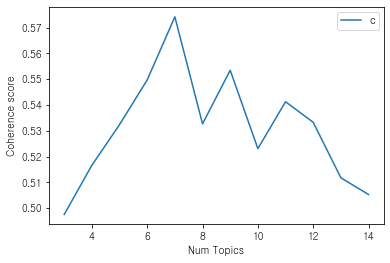

In [23]:
# Show graph
limit=15; start=3; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [24]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.4976
Num Topics = 4  has Coherence Value of 0.5166
Num Topics = 5  has Coherence Value of 0.5324
Num Topics = 6  has Coherence Value of 0.5497
Num Topics = 7  has Coherence Value of 0.5742
Num Topics = 8  has Coherence Value of 0.5327
Num Topics = 9  has Coherence Value of 0.5535
Num Topics = 10  has Coherence Value of 0.5231
Num Topics = 11  has Coherence Value of 0.5413
Num Topics = 12  has Coherence Value of 0.5333
Num Topics = 13  has Coherence Value of 0.5118
Num Topics = 14  has Coherence Value of 0.5053


In [25]:
from pprint import pprint

# Select the model and print the topics
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.024*"판타지" + 0.024*"소녀" + 0.021*"세계" + 0.015*"소년" + 0.014*"요괴" + '
  '0.011*"마법" + 0.010*"저주" + 0.010*"뱀파이어" + 0.010*"찾기" + 0.009*"세상"'),
 (1,
  '0.012*"소년" + 0.010*"선택" + 0.010*"대륙" + 0.010*"드래곤" + 0.008*"과거" + '
  '0.007*"남자" + 0.007*"방울" + 0.007*"지젤" + 0.007*"아렌" + 0.007*"전투"'),
 (2,
  '0.045*"작가" + 0.018*"인간" + 0.012*"세상" + 0.012*"마왕" + 0.012*"악마" + 0.012*"좀비" '
  '+ 0.010*"판타지" + 0.009*"미래" + 0.009*"명작" + 0.007*"로봇"'),
 (3,
  '0.019*"게임" + 0.019*"운명" + 0.014*"웹툰" + 0.011*"지상" + 0.011*"세계" + 0.010*"현실" '
  '+ 0.010*"돌이" + 0.009*"여정" + 0.009*"능력" + 0.008*"사건"'),
 (4,
  '0.050*"만화" + 0.015*"최강" + 0.015*"영웅" + 0.013*"리메이크" + 0.013*"수상작" + '
  '0.012*"자전" + 0.011*"스카우트" + 0.011*"대학" + 0.011*"액션" + 0.010*"지구"'),
 (5,
  '0.012*"마법사" + 0.011*"동생" + 0.011*"정체" + 0.010*"사이" + 0.010*"불명" + '
  '0.009*"소녀" + 0.009*"단편" + 0.009*"신작" + 0.009*"가게" + 0.009*"여행"'),
 (6,
  '0.014*"우주" + 0.012*"전쟁" + 0.011*"인생" + 0.011*"게임" + 0.010*"작품" + '
  '0.008*"호랑이" + 0.008*"인물" + 0.008*"마일로" + 0.008*

λ =1 일수록 토픽 별로 가장 자주 등장하는 단어들을 우선적으로 키워드로 선택한다는 의미 이고

λ = 0 일수록 토픽 간에 차이가 많이 나는 단어를 선택한다는 의미(해당 토픽에서 많이 등장한 단어)입니다.

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word)
vis

In [27]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [28]:
topictable = make_topictable_per_doc(optimal_model, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.5110,"([(0, 0.5109929), (1, 0.012736322), (2, 0.0189..."
1,1,0.0,0.9566,"([(0, 0.95659584)], [(4, [0]), (5, [0]), (6, [..."
2,2,3.0,0.9690,"([(3, 0.9689689)], [(0, [3]), (15, [3]), (16, ..."
3,3,5.0,0.9740,"([(5, 0.97399193)], [(29, [5]), (30, [5]), (31..."
4,4,4.0,0.9655,"([(4, 0.9654779)], [(30, [4]), (45, [4]), (46,..."
5,5,2.0,0.9686,"([(2, 0.96856546)], [(21, [2]), (23, [2]), (54..."
6,6,5.0,0.9740,"([(5, 0.97399336)], [(0, [5]), (1, [5]), (65, ..."
7,7,4.0,0.9777,"([(4, 0.97769916)], [(2, [4]), (31, [4]), (70,..."
8,8,1.0,0.9757,"([(1, 0.9756966)], [(0, [1]), (2, [1]), (8, [1..."
9,9,6.0,0.9837,"([(6, 0.983738)], [(108, [6]), (109, [6]), (11..."


In [29]:
wb_label = pd.merge(wb_copy.reset_index(drop=True), topictable, left_index=True, right_index=True, how='left').drop(columns=['문서 번호'])
wb_label.head(3)

,title,genre,story,platform,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,신의 탑,판타지,자신의 모든 것이었던 소녀를 쫓아 탑에 들어온 소년 그리고 그런 소년을 시험하는 탑,네이버 웹툰,0.0,0.5110,"([(0, 0.5109929), (1, 0.012736322), (2, 0.0189..."
1,앵무살수,판타지,평범한 뱃사공으로 살고 있는 노소하 하지만 그의 정체는 전설적인 구파검법의 후계자...,네이버 웹툰,0.0,0.9566,"([(0, 0.95659584)], [(4, [0]), (5, [0]), (6, [..."
2,만렙돌파,판타지,알 수 없는 오류로 년간 각성 테스트에 갇힌 김기봉 그 사이 현실에선 ...,네이버 웹툰,3.0,0.9690,"([(3, 0.9689689)], [(0, [3]), (15, [3]), (16, ..."


In [30]:
wb_label.to_csv('data/wbt_lda_fantasy.csv', encoding='cp949')